In [1]:
import os
indir = '/home/hsher/bin/PrismNet/results/pos_weight'
weights = os.listdir(indir)

In [2]:
weights

['1', '15', '2', '5', '20', '10']

In [3]:
import pandas as pd
alldata = []
for w in weights:
    file = os.path.join(indir, w, 'out', 'evals', '441_PUM2_K562_PrismNet_pu.metrics')
    data = pd.read_csv(file, sep = '\t', header = None, names = ['accuracy','AUROC', 'AUPRC', 'TP', 'TN', 'FP', 'FN']
                )
    data['pos_weight'] = int(w)
    alldata.append(data)

In [4]:
data

,accuracy,AUROC,AUPRC,TP,TN,FP,FN,pos_weight
441_PUM2_K562,0.779,0.982,0.894,891,7003,2227,10,10


In [5]:
alldf = pd.concat(alldata, axis = 0)

In [6]:
alldf.sort_values(by = 'pos_weight')

,accuracy,AUROC,AUPRC,TP,TN,FP,FN,pos_weight
441_PUM2_K562,0.854,0.965,0.789,852,7799,1431,49,1
441_PUM2_K562,0.948,0.974,0.853,796,8808,422,105,2
441_PUM2_K562,0.807,0.976,0.867,877,7302,1928,24,5
441_PUM2_K562,0.779,0.982,0.894,891,7003,2227,10,10
441_PUM2_K562,0.734,0.979,0.872,889,6545,2685,12,15
441_PUM2_K562,0.719,0.980,0.871,892,6391,2839,9,20


Text(0.5, 1.0, 'Trying different weight for positive labels')

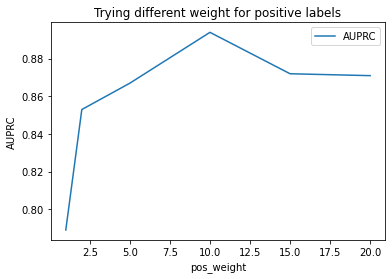

In [11]:
import matplotlib.pyplot as plt
alldf.sort_values(by = 'pos_weight').plot(x = 'pos_weight', y = 'AUPRC')
plt.ylabel('AUPRC')

plt.title('Trying different weight for positive labels')